# CNN

In [11]:
import os
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

In [12]:
EPOCH = 1
BATCH_SIZE = 50
LR = 0.001
DOWNLOAD_MNIST = False

In [13]:
if not(os.path.exists('./mnist')) or not os.listdir('./mnist'):
    DOWNLOAD_MNIST = True

In [14]:
train_data = torchvision.datasets.MNIST(
    root='./mnist',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=DOWNLOAD_MNIST,
)

In [15]:
print(train_data.train_data.size())

torch.Size([60000, 28, 28])


In [16]:
print(train_dataa.train_labels.size())

NameError: name 'train_dataa' is not defined

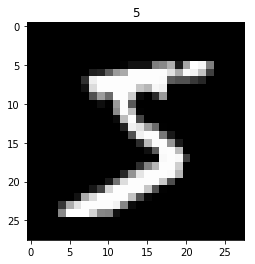

In [17]:
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [18]:
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [20]:
test_data = torchvision.datasets.MNIST(root='./mnist', train=False)
test_x = Variable(
    torch.unsqueeze(
        test_data.test_data, dim=1), 
    volatile=True).type(torch.FloatTensor)[:2000]/255.
test_y = test_data.test_labels[:2000]

In [21]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        
        self.out = nn.Linear(32 * 7 * 7, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x
        

In [22]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d (1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (conv2): Sequential(
    (0): Conv2d (16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (out): Linear(in_features=1568, out_features=10)
)


In [23]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

In [27]:
from matplotlib import cm
from sklearn.manifold import TSNE
HAS_SK = True


In [28]:
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer'); plt.show(); plt.pause(0.01)

Epoch:  0 | train loss: 2.2714 | test accuracy: 0.12


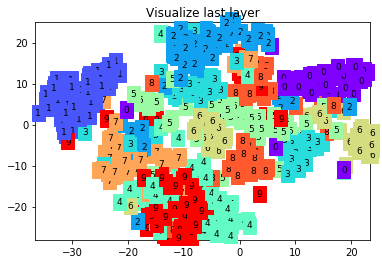

Epoch:  0 | train loss: 0.5173 | test accuracy: 0.81


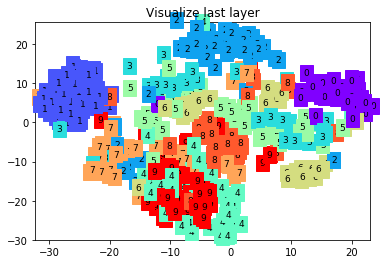

Epoch:  0 | train loss: 0.3845 | test accuracy: 0.89


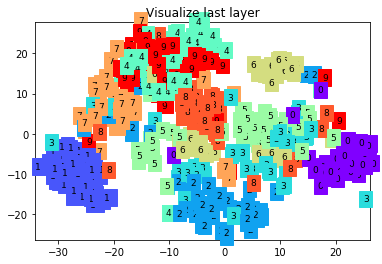

Epoch:  0 | train loss: 0.2646 | test accuracy: 0.91


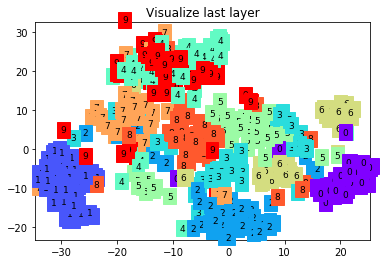

Epoch:  0 | train loss: 0.1332 | test accuracy: 0.94


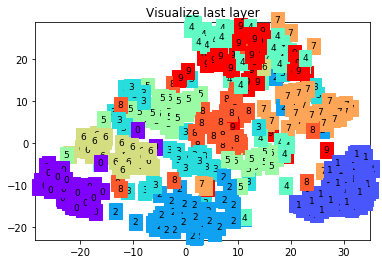

Epoch:  0 | train loss: 0.1124 | test accuracy: 0.94


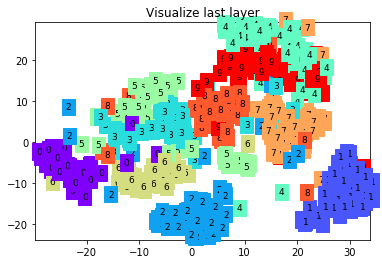

Epoch:  0 | train loss: 0.1806 | test accuracy: 0.95


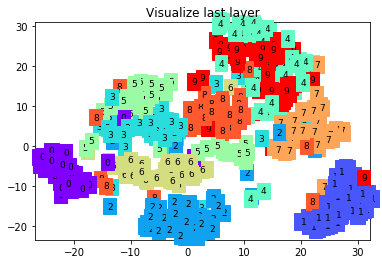

Epoch:  0 | train loss: 0.1935 | test accuracy: 0.95


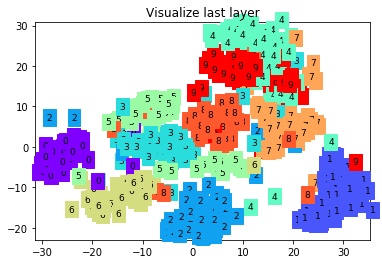

Epoch:  0 | train loss: 0.1158 | test accuracy: 0.96


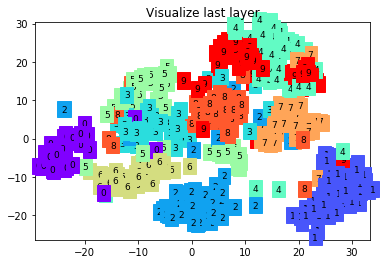

Epoch:  0 | train loss: 0.0181 | test accuracy: 0.97


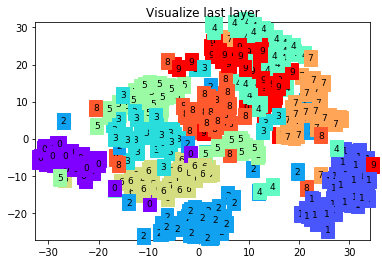

Epoch:  0 | train loss: 0.0660 | test accuracy: 0.96


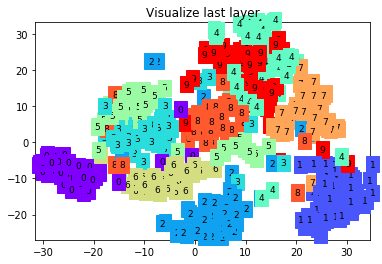

Epoch:  0 | train loss: 0.1814 | test accuracy: 0.97


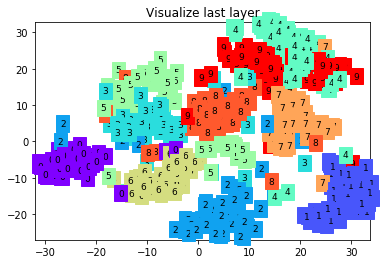

Epoch:  0 | train loss: 0.0237 | test accuracy: 0.97


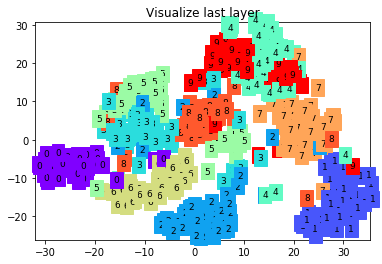

Epoch:  0 | train loss: 0.0722 | test accuracy: 0.97


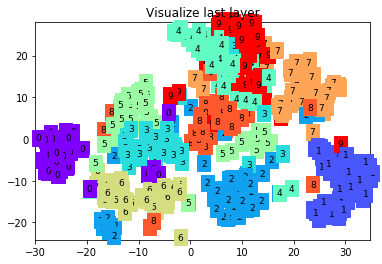

Epoch:  0 | train loss: 0.0606 | test accuracy: 0.98


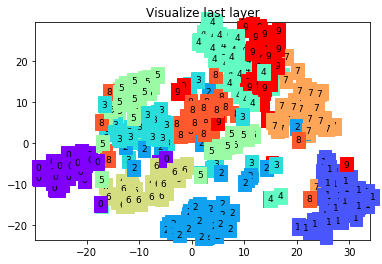

Epoch:  0 | train loss: 0.1136 | test accuracy: 0.97


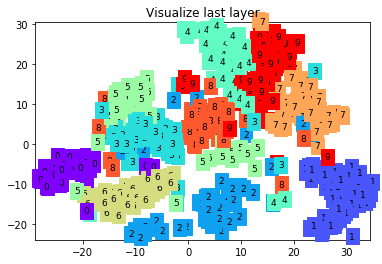

Epoch:  0 | train loss: 0.0335 | test accuracy: 0.97


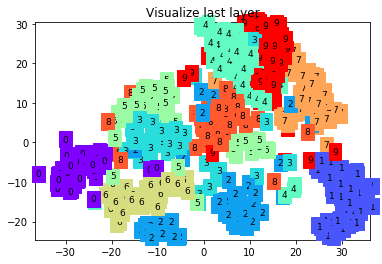

Epoch:  0 | train loss: 0.0164 | test accuracy: 0.97


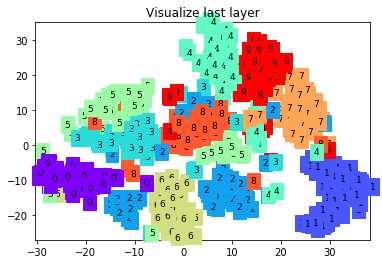

Epoch:  0 | train loss: 0.0292 | test accuracy: 0.98


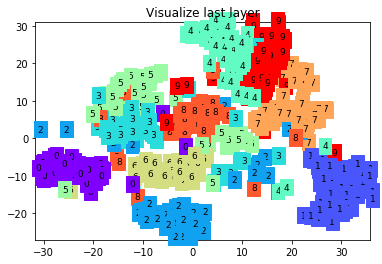

Epoch:  0 | train loss: 0.0293 | test accuracy: 0.97


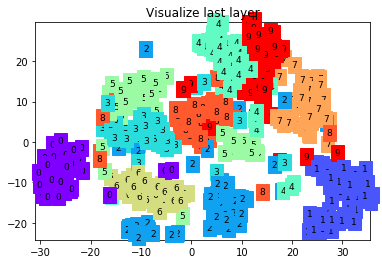

Epoch:  0 | train loss: 0.0562 | test accuracy: 0.97


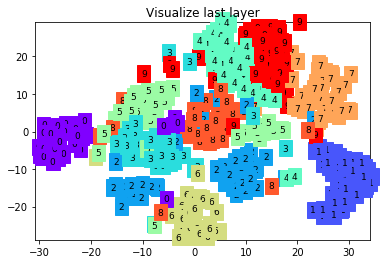

Epoch:  0 | train loss: 0.0469 | test accuracy: 0.98


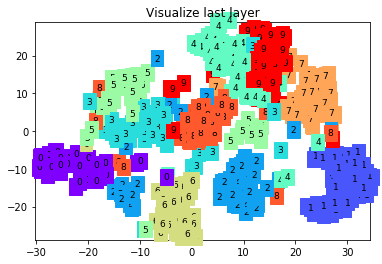

Epoch:  0 | train loss: 0.0130 | test accuracy: 0.98


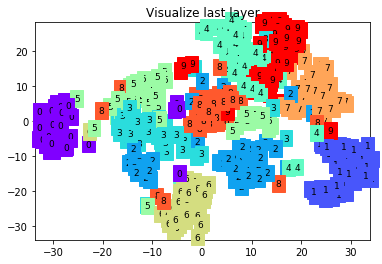

Epoch:  0 | train loss: 0.0554 | test accuracy: 0.98


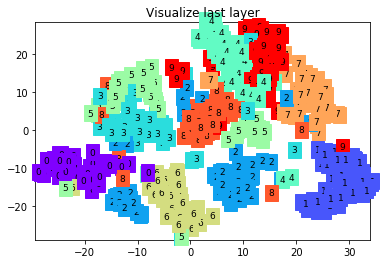

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


In [29]:
plt.ion()
# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 50 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = sum(pred_y == test_y) / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data[0], '| test accuracy: %.2f' % accuracy)
            if HAS_SK:
                # Visualization of trained flatten layer (T-SNE)
                tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
                plot_only = 500
                low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
                labels = test_y.numpy()[:plot_only]
                plot_with_labels(low_dim_embs, labels)
plt.ioff()

# print 10 predictions from test data
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')